# Multiclass Classification
Author: Christoph Guettner

**Abstract**  
Im Folgenden werden drei Datensätze mit muliplen Klassen (Supervised Learning) mittels  
zehn verschiedener _Classifer_ beschrieben. Bei den Datensätzen handelt es sich um zweidimensionale  
Inputs mit i) vier KLassen, ii) sechs KLassen, iii) neun Klassen. Bei dem Ensemble von _Classifer_   
treten "Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process", "Decision Tree",  
"Random Forest", "Neural Net", "AdaBoost", "Naive Bayes" und "QDA" an. Zuletzt werden    
die Scores und Konfusions Matrizen für jeden _Classifier_ dargestellt.
 

## Table of Contents

* [Loading and Preprocessing](#Loading_and_Preprocessing)
    * [Class Imports](#Class_Imports)
    * [Functions](#Functions)
    * [Explorative Data Visualisation](#Explorative_Data_Visualisation)

* [Classifier Comparison with 10 Algorithms](#Classifier_Comparison_with_10_Algorithms)
    * [Model Training](#Model_Training)

* [Performance Analysis](#Performance_Analysis)
    * [Score Comparison](#Score_Comparison)
    * [Confusion Matrices](#Confusion_Matrices)
       

## Loading_and_Preprocessing

### Class_Imports

In [4]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_blobs, make_classification, make_gaussian_quantiles
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

%matplotlib inline
sns.set()

In [5]:
# Functions
def load_classification(n_samples):
    X, y = make_classification(n_samples=samples, n_features=2, n_classes=4, n_redundant=0, n_informative=2,
                             n_clusters_per_class=1)
    return X,y

def load_Gaussian(n_samples):
    X, y = make_gaussian_quantiles(n_samples=samples, cov=0.7, n_features=2, n_classes=6)
    return X,y

def load_blobs(centers, n_samples):
    X, y = make_blobs(n_samples=samples, n_features=2, centers=centers, cluster_std=7)
    return X,y

def plot_Data(Dataset_list, title, subtitle):
    fig = plt.figure(figsize=(15, 5), facecolor=(.18, .31, .31))
    fig.suptitle(title, color ='0.7')
    for i in range(len(Dataset_list)):
        plt.subplot(1,3,(i+1))
        plt.title(subtitle[i], color='0.7')
        plt.scatter(Dataset_list[i][0][:,0], Dataset_list[i][0][:, 1], marker='o', c=Dataset_list[i][1], 
                s=25, edgecolor='k', cmap='bwr')
        plt.tick_params(axis='both', colors='orange')

def get_classifier_canon(Dataset_list, classifier_list, names_list):
    Classification_Score,Gaussian_Score,Cluster_Score = [],[],[]
    Class_Test,Gauss_Test,Clust_Test = [],[],[]
    Class_Predictions, Gauss_Predictions,Clust_Predictions = [],[],[]
    for data_cn, data in enumerate(Dataset_list):
        X,y = data
        X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8, random_state=42)
        for clf_names, clf in zip(names_list, classifier_list):
            clf.fit(X_train,y_train)
            score = clf.score(X_test,y_test)
            prediction = clf.predict(X_test)
            if data_cn == 0:
                Classification_Score.append(score)
                Class_Test.append(y_test)
                Class_Predictions.append(prediction)
            elif data_cn == 1:
                Gaussian_Score.append(score)
                Gauss_Test.append(y_test)
                Gauss_Predictions.append(prediction)
            elif data_cn == 2:
                Cluster_Score.append(score)
                Clust_Test.append(y_test)
                Clust_Predictions.append(prediction)
            else:
                print('Error')
    return [Classification_Score, Gaussian_Score, Cluster_Score], \
            [Class_Test, Gauss_Test, Clust_Test], \
            [Class_Predictions, Gauss_Predictions, Clust_Predictions]

def get_ScoredDataframe(columnnames, Score_list, index):
    dict ={columnnames[i]: Score_list[i] for i in range(len(columnnames))}
    df = pd.DataFrame(dict, index=index)
    return df

def plot_BarScores(df):
    fig, axes = plt.subplots(1,1, figsize=(15,5), facecolor=(.18, .31, .31))
    fig.suptitle('Classifier_Scores', color ='0.7')
    df.plot.bar(figsize=(15,5), cmap ='Oranges', ax=axes,rot=35)
    axes.tick_params(labelcolor='0.7')

def get_ConfusionMatrices(Test_list,Predictions_list):
    Confusion_Matrices =[]
    for i in range(len(Predictions_list)):
        cm = [confusion_matrix(a,b) for a,b in zip(Test_list[i], Predictions_list[i])]
        Confusion_Matrices.append(cm)
    return Confusion_Matrices


def plot_Confusion(list, names, k):
    fig, axes = plt.subplots(2,5, figsize=(18,7), facecolor=(.18, .31, .31), sharex=True, sharey=True)
    fig.suptitle('Classification_Confusion', color ='0.7')
    list = list[k]
    for i,ax in enumerate(axes.flatten()):
        sns.heatmap(list[i], ax=ax, annot=True, cmap='Blues')
        ax.set_title(names[i], color='orange')
        ax.set_xlabel('True', color ='0.7')
        ax.set_ylabel('Prdicted', color ='0.7')
        ax.tick_params(labelcolor='tab:orange')

    

### Explorative_Data_Visualisation

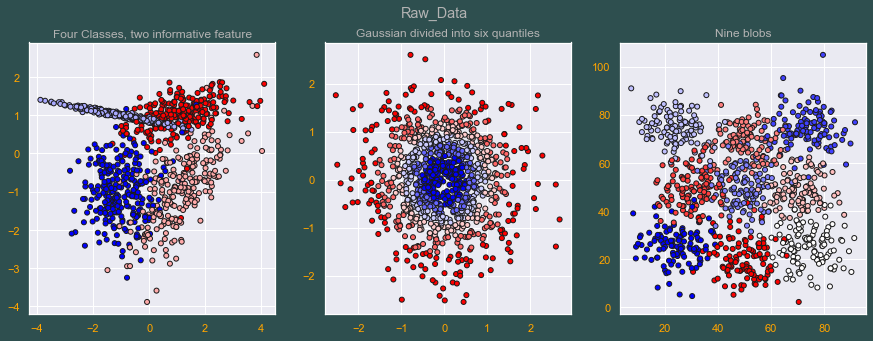

In [8]:
#get Data
samples = 1000; centers = [(25,25), (75, 75), (50, 50), (25,75), (75,25), (70,50), (50, 70), (30, 50), (50,20)]
Informativ = load_classification(samples); Gauss= load_Gaussian(samples); Centers = load_blobs(centers, samples)
Data = [Informativ, Gauss, Centers]
title='Raw_Data'
subtitle = ["Four Classes, two informative feature","Gaussian divided into six quantiles","Nine blobs" ]
plot_Data(Data,title, subtitle)


## Classifier_Comparison_with_10_Algorithms

In [9]:
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [10]:


names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

In [11]:
#get classifier canon
Score_list, Test_list,Predictions_list = get_classifier_canon(Data, classifiers, names)

## Performance_Analysis

### Score_Comparison

**Accuracy Score:**
Der hier angewendete __Accuracy Score__ beschreibt das Verhältnis von  
korrekt klassifizierten Testpunkten zu den gesamten Testpunkten (Jaccard Score). 

    

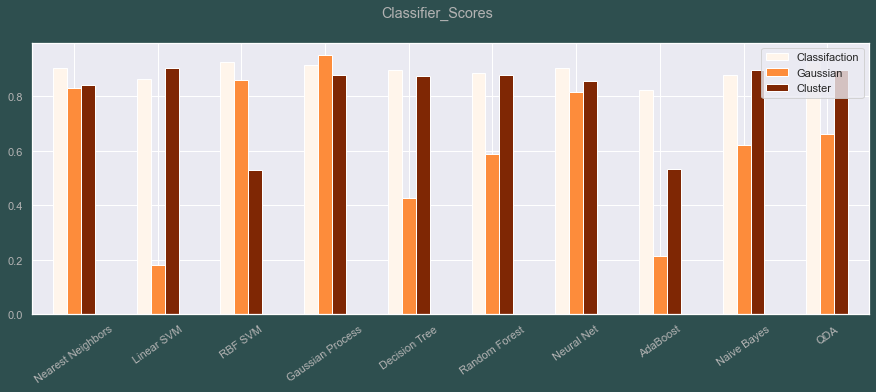

In [12]:
index = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]
columnnames = ['Classifaction', 'Gaussian', 'Cluster' ]

df_scores = get_ScoredDataframe(columnnames, Score_list, index)
plot_BarScores(df_scores)


### Confusion_Matrices

Die Konfusion Matrix kann im Falle binärer und mulipler Klassifikation in vier Quadranten aufgeteilt  
werden, die die folgenden Kennzahlen beschreiben.  
      
**True Positive (auch: Hit):** Ein Hit beschreibt eine positive vorhergesagte Klassenzugehörigkeit,  
wenn der entsprechende Datenpunkt tatsächlich dieser KLasse zugehört.   

**True Negative (auch: Correct Rejection):** Eine korrekte Abweisung  
beschreibt eine negative vorhergesagte KLassenzugehörigkeit, wenn der entpsrechende  
Datenpunkt tatächlich nicht dieser Klasse zugehört.  

**False Positive (auch: Type I Error oder False Alarm):** Ein falscher Alarm beschreibt  
einen positive vorhergesgte KLassenzugehörigkeit, wenn tatsächlich keine KLassenzugehörigkeit  
besteht.  

**False Negative (auch:Type II Error oder Miss):** Ein beschreibt eine negative vorhergesagte  
KLassenzugehörigkeit, wenn der entsprechende Datenpunkt tatächlich aber dieser Klasse zugehört.  

Mit **Precision and Recall** bzw. dem **F score **(Sørensen–Dice coefficient) können die Konfusion Matrix weiter spezifiziert werden.

      

In [13]:

# get list of lists of Confusion Matrices
Confusion_Matrices = get_ConfusionMatrices(Test_list,Predictions_list)


#### Classifaction_Dataset

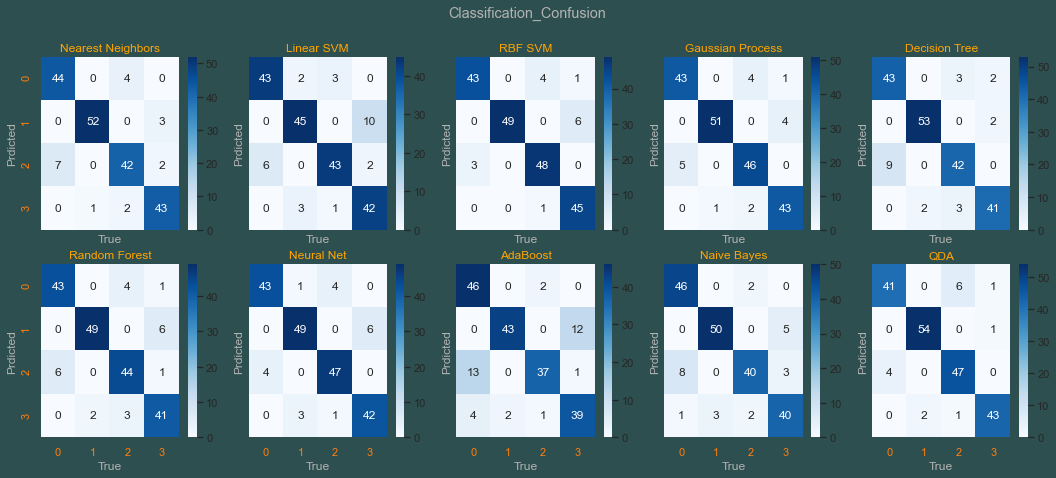

In [14]:
#plot Confusion(list, names, k as list elmenent list[k])
plot_Confusion(Confusion_Matrices, names, 0)
    

#### Gaussian_Quantiles_Dataset
        

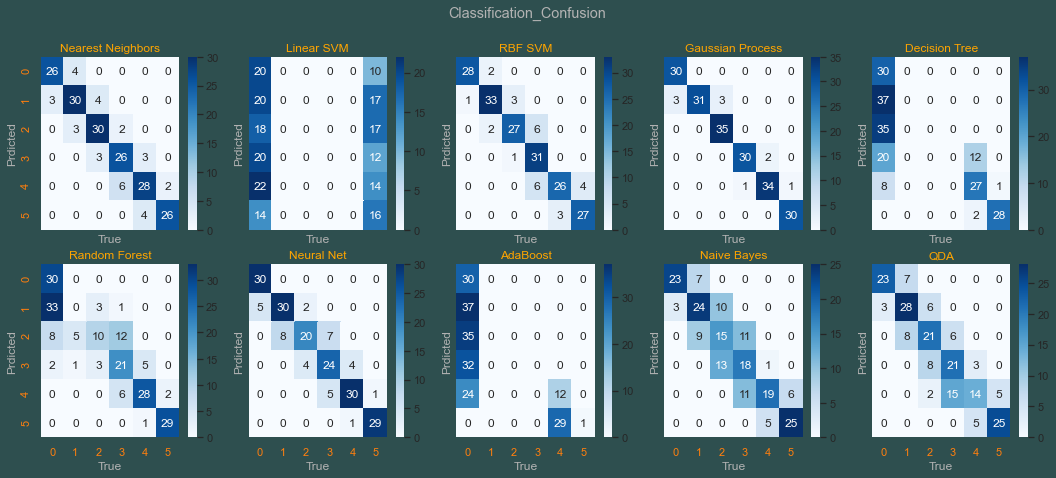

In [15]:

plot_Confusion(Confusion_Matrices, names, 1)

#### Nine_Blobs_Dataset

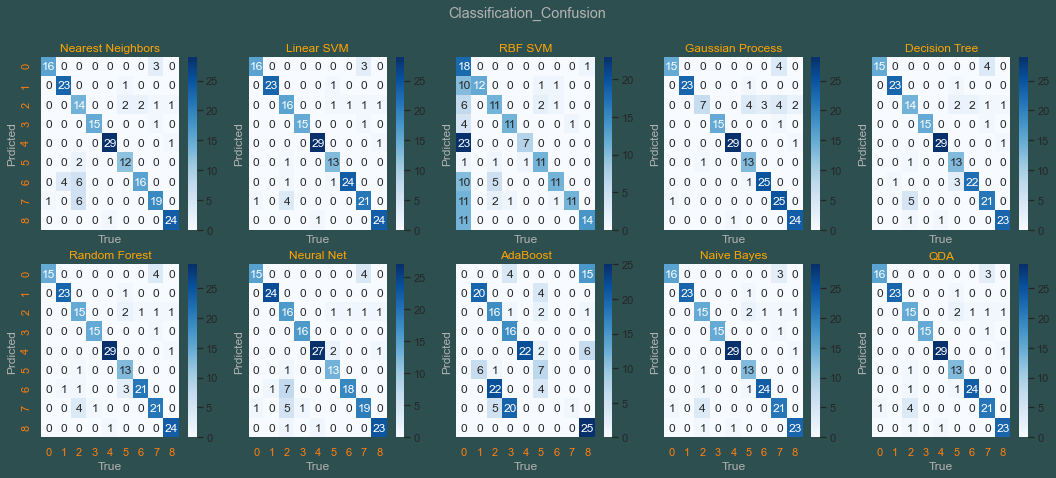

In [16]:
plot_Confusion(Confusion_Matrices, names, 2)